In [1]:
import time
import argparse
import random
import os
import warnings
from importlib import import_module
import cv2


warnings.filterwarnings('ignore')

import torch
import numpy as np
from tqdm import tqdm

from datasets.data_loader import setup_loader
from datasets.data_loader import CustomDataLoader
from config import Config
import matplotlib.pyplot as plt

In [2]:
config = Config(
    lr=0.0001,
    epochs=20,
    batch_size=8,
    seed=21,
    eval=False,
    augmentation='CustomAugmentation7',
    criterion='cross_entropy',
    optimizer='adam',
    model='unetmnv2',
    continue_load='',
    eval_load='',
    dataset_path='../input/data')

Config(lr=0.0001, epochs=20, batch_size=8, seed=21, eval=False, augmentation='CustomAugmentation7', criterion='cross_entropy', optimizer='adam', model='unetmnv2', eval_load='', continue_load='', dataset_path='../input/data')
pytorch version: 1.6.0
GPU 사용 가능 여부: True
Tesla P40
1
Number of super categories: 11
Number of categories: 11
Number of annotations: 21116
Number of images: 2617


,Categories,Number of annotations
0,Backgroud,NaN
1,UNKNOWN,128.0
2,General trash,2225.0
3,Paper,7448.0
4,Paper pack,527.0
5,Metal,449.0
6,Glass,488.0
7,Plastic,2472.0
8,Styrofoam,1074.0
9,Plastic bag,6114.0


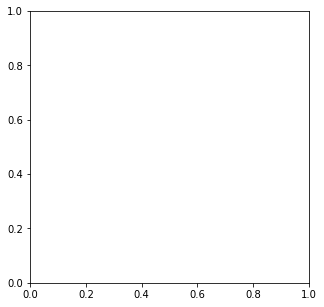

In [3]:
print(config)

print('pytorch version: {}'.format(torch.__version__))
print('GPU 사용 가능 여부: {}'.format(torch.cuda.is_available()))

print(torch.cuda.get_device_name(0))
print(torch.cuda.device_count())

device = "cuda" if torch.cuda.is_available() else "cpu"  # GPU 사용 가능 여부에 따라 device 정보 저장

sorted_df = setup_loader(config)

# train.json / validation.json / test.json 디렉토리 설정
# train_path = config.dataset_path + '/train.json'
train_path = 'split_sample.json'

# collate_fn needs for batch
def collate_fn(batch):
    return tuple(zip(*batch))

In [4]:
# import json
# with open(train_path, "r") as st_json:
#
#     st_python = json.load(st_json)
# st_python

In [5]:
augmentation_module = getattr(import_module("transforms.Augmentations"), config.augmentation)
train_transform = augmentation_module(mode='train')
train_dataset = CustomDataLoader(data_dir=train_path, sorted_df=sorted_df, mode='train', dataset_path='',transform=train_transform)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=config.batch_size,
                                          num_workers=2,
                                          collate_fn=collate_fn)

loading annotations into memory...
Done (t=0.02s)
creating index...
index created!


Start extracting..


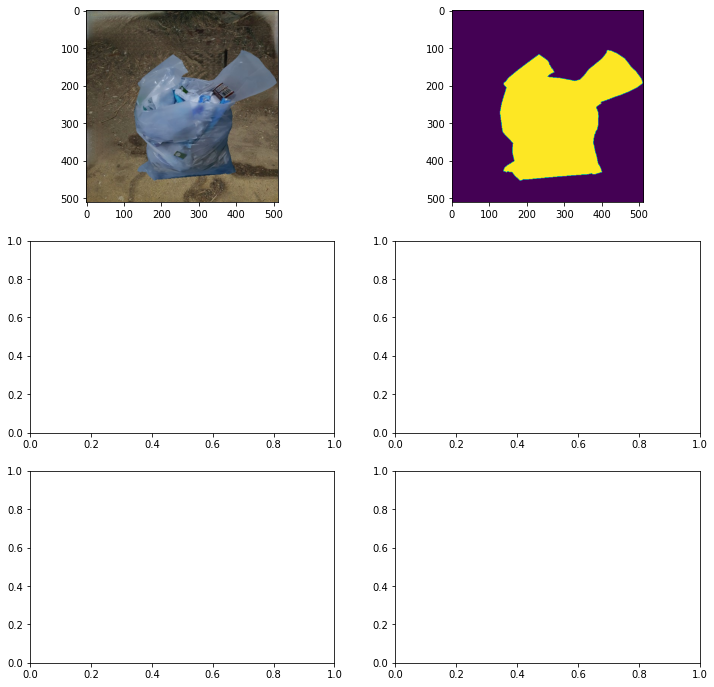

In [7]:
print('Start extracting..')
for images, masks, informs in iter(train_loader):
    images = torch.stack(images)  # (batch, channel, height, width)
    masks = torch.stack(masks).long()  # (batch, channel, height, width)
    B = images.shape[0]
    fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))

    for i in range(B):
        image = images[i]
        mask = masks[i]
        inform = informs[i]

        ax1.imshow(image.permute([1, 2, 0]))
        ax2.imshow(mask)
        plt.show()
        break
    break